In [ ]:
# default_exp nbeats.learner

In [ ]:
# hide
import sys

sys.path.append("..")
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# N-Beats Learner

> A basic architecture for time series forecasting.


The approach is based on https://arxiv.org/abs/1905.10437


In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
from fastcore.utils import *
from fastcore.imports import *
from fastai2.basics import *
from fastai2.callback.hook import num_features_model
from fastai2.callback.all import *
from fastai2.torch_core import *
from torch.autograd import Variable
from fastseq.all import *

from fastseq.nbeats.model import *
from fastseq.nbeats.callbacks import *

## Learner

In [ ]:
# export
# from fastai2.basics import *
# from fastseq.all import *

@delegates(NBeatsNet.__init__)
def nbeats_learner(dbunch:TSDataLoaders, output_channels=None, metrics=None,cbs=None, b_loss=0., loss_func=None, **kwargs):
    "Build a N-Beats style learner"  
    model = NBeatsNet(
        device = dbunch.train.device,
        horizon = dbunch.train.horizon,
        lookback = dbunch.train.lookback, 
        **kwargs
       )
    
    loss_func = ifnone(loss_func, F.mse_loss)
    cbs = L(cbs)
    if b_loss != 0.:
        raise NotImplementedError()
        cbs.append(NBeatsBLoss(b_loss))
    learn = Learner(dbunch, model, loss_func=loss_func, opt_func= Adam, 
                    metrics=L(metrics)+L(mae, smape, NBeatsBackwards(), NBeatsTheta()),
                    cbs=L(NBeatsAttention())+cbs
                   )
    learn.lh = (dbunch.train.lookback/dbunch.train.horizon)
    return learn

# Example

Train:40; Valid: 20; Test 10


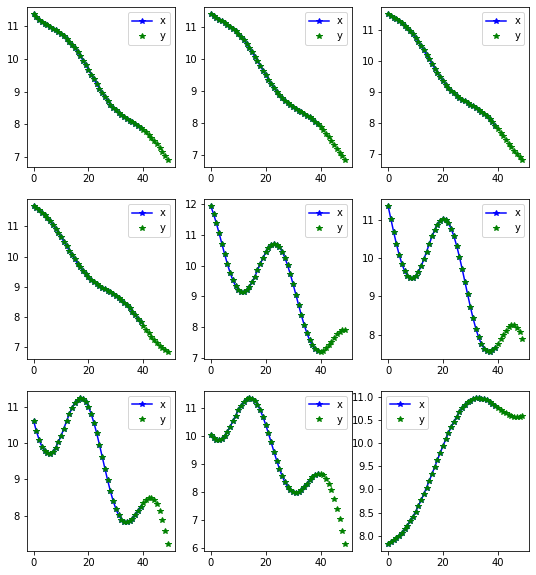

In [ ]:
horizon, lookback = 10,40
items = dummy_data_generator(75, 10, nrows=10)
data = TSDataLoaders.from_items(items, horizon = horizon, lookback=lookback, step=3, valid_pct=.5
                               )
data.show_batch()

In [ ]:
learn = nbeats_learner(data)

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.839562,1.947522,0.989424,1.455170,0.663491,0.149283,00:00
1,1.602976,1.861883,0.937483,1.291352,0.553584,0.223454,00:00
2,1.452275,1.811254,0.904874,1.196796,0.495394,0.292868,00:00
3,1.357059,1.778159,0.886320,1.140202,0.472200,0.356495,00:00
4,1.283085,1.764731,0.878724,1.104832,0.467518,0.404813,00:00


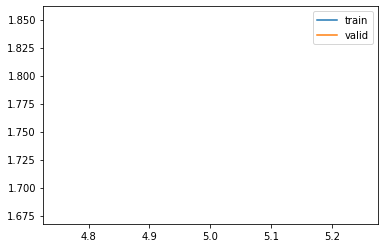

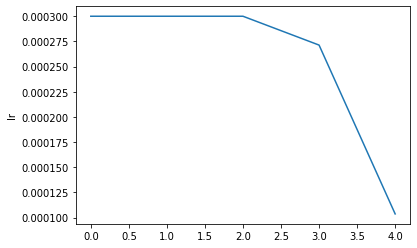

In [ ]:
learn.fit_flat_cos(5, 3e-4, pct_start=.5)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

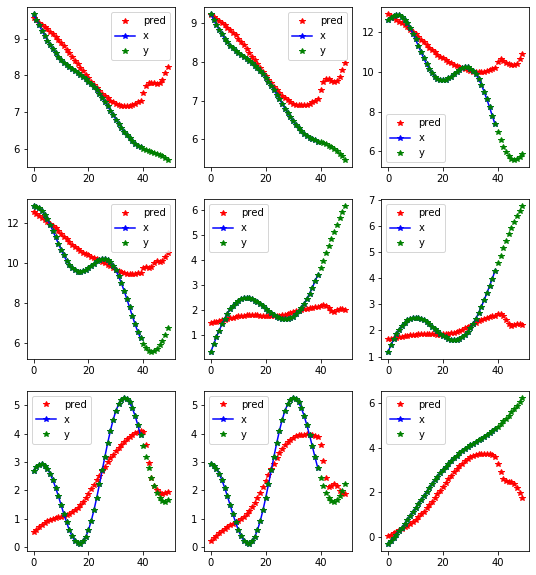

In [ ]:
learn.show_results()

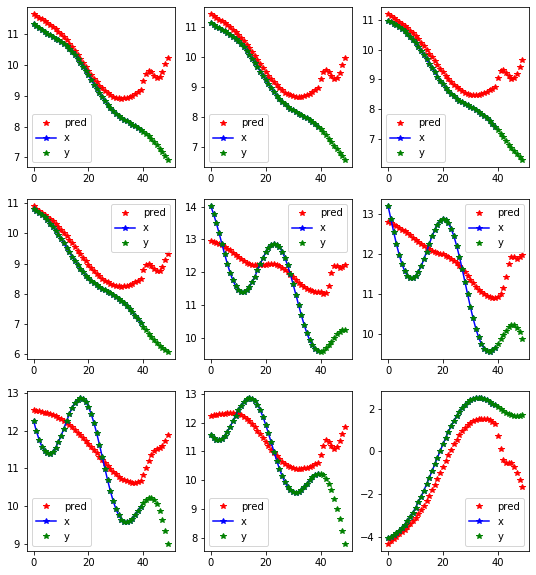

In [ ]:
learn.show_results(0)

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,-0.00049905403,0.0020963245,-0.06178602,-0.058546305,-0.065157175,-0.09868183
theta_0_std,0.016949924,0.0040960545,0.26653773,0.22645585,0.1938688,0.057985485
theta_1_mean,0.00025713796,0.0004979653,0.03744275,-0.0071868226,-0.05012096,0.014270963
theta_1_std,0.0010477597,0.00055521366,0.044859905,0.06353013,0.0927513,0.049315408
theta_2_mean,8.225899e-05,-8.125598e-06,0.05270639,-0.08436497,0.0039011776,-0.009552492
theta_2_std,0.00038699675,6.262318e-05,0.29377156,0.14962362,0.009052486,0.013788514
att_mean,0.485177,0.506855,0.504126,0.505396,0.506369,0.494554
att_std,0.0616845,0.0403358,0.0250709,0.0261731,0.0268128,0.0176117
theta_3_mean,NaN,-7.593227e-06,NaN,0.045356635,0.04495877,-0.013990042
theta_3_std,NaN,2.2919145e-05,NaN,0.047102943,0.19272506,0.106365636


In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 05_nbeats.models.ipynb.
Converted 06_nbeats.callbacks.ipynb.
Converted 07_nbeats.learner.ipynb.
Converted 08_nbeats.interpret.ipynb.
Converted 11_metrics.ipynb.
Converted 12_compare.ipynb.
Converted index.ipynb.
